In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax


def get_grid_background(shape=(100, 100), grid_space=50, bg_color=(255,255,255), grid_color=(0,0,0)):
    """
        指定されたサイズの画像を生成し、グリッドを描画した画像を返却する関数
    """

    img = np.zeros((shape[0], shape[1], 3), np.uint8)
    img += np.array(bg_color, np.uint8)

    img[grid_space:img.shape[0]:grid_space, :, :] = np.array(grid_color, np.uint8)
    img[:, grid_space:img.shape[1]:grid_space, :] = np.array(grid_color, np.uint8)

    return img

(<Figure size 960x720 with 1 Axes>, <Axes: >)

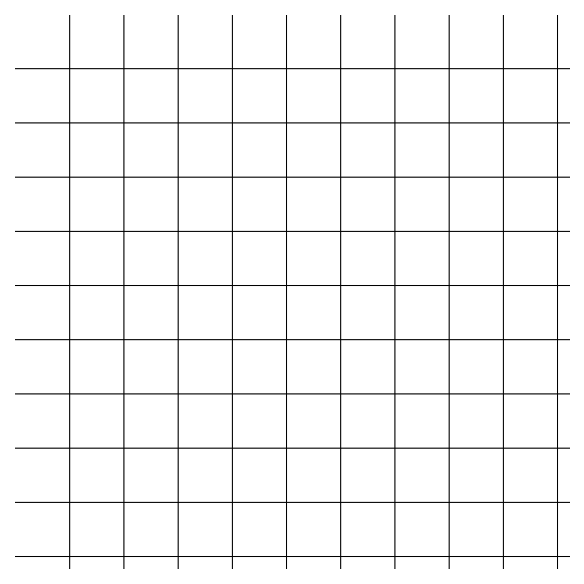

In [2]:
base_image = get_grid_background(shape=(512, 512))

show_img(base_image)

# 図形描画のサンプル

[https://note.nkmk.me/python-opencv-draw-function/](https://note.nkmk.me/python-opencv-draw-function/) より

(<Figure size 960x720 with 1 Axes>, <Axes: >)

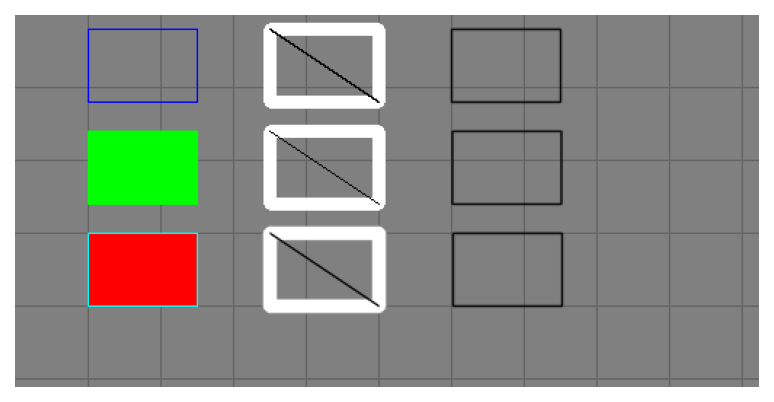

In [3]:
img = get_grid_background(shape=(256, 512), bg_color=(128,128,128), grid_color=(100,100,100))

cv2.rectangle(img, (50, 10), (125, 60), (255, 0, 0))
cv2.rectangle(img, (50, 80), (125, 130), (0, 255, 0), thickness=-1)
cv2.rectangle(img, (50, 150), (125, 200), (0, 0, 255), thickness=-1)
cv2.rectangle(img, (50, 150), (125, 200), (255, 255, 0))

cv2.rectangle(img, (175, 10), (250, 60), (255, 255, 255), thickness=8, lineType=cv2.LINE_4)
cv2.line(img, (175, 10), (250, 60), (0, 0, 0), thickness=1, lineType=cv2.LINE_4)
cv2.rectangle(img, (175, 80), (250, 130), (255, 255, 255), thickness=8, lineType=cv2.LINE_8)
cv2.line(img, (175, 80), (250, 130), (0, 0, 0), thickness=1, lineType=cv2.LINE_8)
cv2.rectangle(img, (175, 150), (250, 200), (255, 255, 255), thickness=8, lineType=cv2.LINE_AA)
cv2.line(img, (175, 150), (250, 200), (0, 0, 0), thickness=1, lineType=cv2.LINE_AA)

cv2.rectangle(img, (600, 20), (750, 120), (0, 0, 0), lineType=cv2.LINE_AA, shift=1)
cv2.rectangle(img, (601, 160), (751, 260), (0, 0, 0), lineType=cv2.LINE_AA, shift=1)
cv2.rectangle(img, (602, 300), (752, 400), (0, 0, 0), lineType=cv2.LINE_AA, shift=1)

show_img(img)


(<Figure size 960x720 with 1 Axes>, <Axes: >)

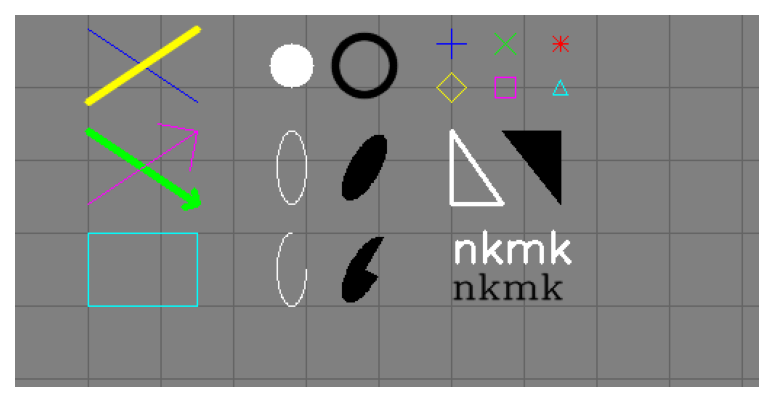

In [4]:
img = get_grid_background(shape=(256, 512), bg_color=(128,128,128), grid_color=(100,100,100))


cv2.line(img, (50, 10), (125, 60), (255, 0, 0))
cv2.line(img, (50, 60), (125, 10), (0, 255, 255), thickness=4, lineType=cv2.LINE_AA)

cv2.arrowedLine(img, (50, 80), (125, 130), (0, 255, 0), thickness=4)
cv2.arrowedLine(img, (50, 130), (125, 80), (255, 0, 255), tipLength=0.3)

cv2.rectangle(img, (50, 150), (125, 200), (255, 255, 0))

cv2.circle(img, (190, 35), 15, (255, 255, 255), thickness=-1)
cv2.circle(img, (240, 35), 20, (0, 0, 0), thickness=3, lineType=cv2.LINE_AA)

cv2.ellipse(img, ((190, 105), (20, 50), 0), (255, 255, 255))
cv2.ellipse(img, ((240, 105), (20, 50), 30), (0, 0, 0), thickness=-1)

cv2.ellipse(img, (190, 175), (10, 25), 0, 0, 270, (255, 255, 255))
cv2.ellipse(img, (240, 175), (10, 25), 30, 0, 270, (0, 0, 0), thickness=-1)

cv2.drawMarker(img, (300, 20), (255, 0, 0))
cv2.drawMarker(img, (337, 20), (0, 255, 0), markerType=cv2.MARKER_TILTED_CROSS, markerSize=15)
cv2.drawMarker(img, (375, 20), (0, 0, 255), markerType=cv2.MARKER_STAR, markerSize=10)

cv2.drawMarker(img, (300, 50), (0, 255, 255), markerType=cv2.MARKER_DIAMOND)
cv2.drawMarker(img, (337, 50), (255, 0, 255), markerType=cv2.MARKER_SQUARE, markerSize=15)
cv2.drawMarker(img, (375, 50), (255, 255, 0), markerType=cv2.MARKER_TRIANGLE_UP, markerSize=10)

pts = np.array(((300, 80), (300, 130), (335, 130)))
cv2.polylines(img, [pts], True, (255, 255, 255), thickness=2)

pts = np.array(((335, 80), (375, 80), (375, 130)))
cv2.fillPoly(img, [pts], (0, 0, 0))

cv2.putText(img, 'nkmk', (300, 170), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), thickness=2)
cv2.putText(img, 'nkmk', (300, 195), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 0, 0), lineType=cv2.LINE_AA)

show_img(img)

# 日本語を扱えるようにする

(<Figure size 960x720 with 1 Axes>, <Axes: >)

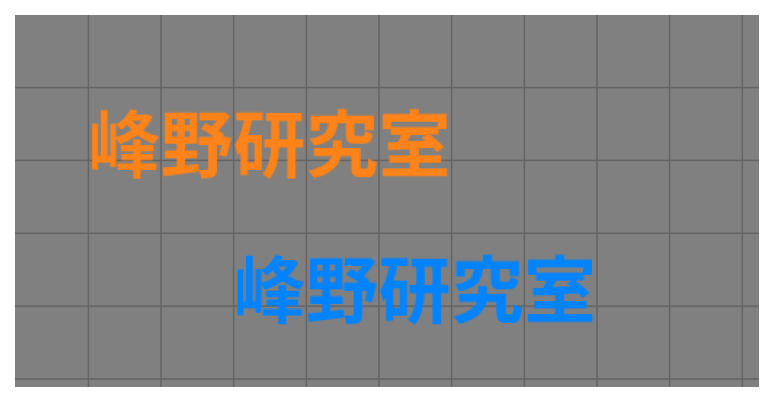

In [16]:
from PIL import ImageFont, ImageDraw, Image

def putText_japanese(img, text, point, size, color):
    font = ImageFont.truetype('/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc', size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text(point, text, fill=color, font=font)
    return np.array(img_pil)

img= get_grid_background(shape=(256, 512), bg_color=(128,128,128), grid_color=(100,100,100))

img = putText_japanese(img, "峰野研究室", (50, 50), 50, (25, 131, 255))
img = putText_japanese(img, "峰野研究室", (150, 150), 50, (255, 131, 0))

show_img(img)